# Coursera Data Science Capstone (2)
continuing from the previous notebook, this one includes modeling and analying clusters

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
%matplotlib inline

In [84]:
# import dataset
final_df = pd.read_csv('final_df.csv',encoding = "ISO-8859-1")
final_df.set_index(final_df['Neighborhood'], drop=True, inplace=True)
final_df.drop('Neighborhood', axis=1, inplace=True)
final_df.head()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Breakfast Spot,Seafood Restaurant,Athletics & Sports,...,Gay Bar,Snack Place,Vegetarian / Vegan Restaurant,Diner,Performing Arts Venue,Health Food Store,German Restaurant,Fish & Chips Shop,Pool,Pizza Place
Neighborhood,,,,,,,,,,,,,,,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,0.000,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123,0.125,0.428571,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.153846
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,0.000,0.142857,0.5,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.307692


## Part 4: Modeling
- agglomerative clustering
- plot dendrogram

In [85]:
feature_mtx = final_df.values
feature_mtx[0]

array([0.00952381, 0.00377778, 0.00160772, 0.01661342, 0.00939306,
       0.00624088, 0.        , 0.        , 0.14285714, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.4       ,
       0.        , 0.        , 0.03125   , 0.08333333, 0.        ,
       0.        , 0.        , 0.        , 0.09090909, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14285714, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07692308, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.     

In [86]:
feature_mtx.shape

(72, 122)

------------------------------------------------------------------------__Experimentation Agglomerative Clustering__-----------------------------------------------------------------------------

affinity = cosine     __VS__      euclidean-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [87]:
# use model Agglomerative Clustering from sklearn
# affinity = cosine
agglom_cos = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='complete', distance_threshold=1.2)
agglom_cos.fit(feature_mtx)
print(agglom_cos.labels_)
print(agglom_cos.n_clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
None


In [88]:
# affinity = euclidean (default)
agglom0 = AgglomerativeClustering(n_clusters=5, linkage='complete')
agglom0.fit(feature_mtx)
print(agglom0.labels_)
print(agglom0.n_clusters)

[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
5


Use __distance_threshold__ option---------------------------------------------------------------------------------------------------------------------------------------------------------------

In [89]:
agglom1 = AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=2.5)
agglom1.fit(feature_mtx)
print(agglom1.labels_)
print(agglom1.n_clusters_)

[1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 0 1 1 1 1 5 1 1 1 0 1 1 1 1 4 3
 6 1 1 1 1 1 1 1 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 8 1 1 1]
10


In [90]:
agglom = AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=3)
agglom.fit(feature_mtx)
print(agglom.labels_)
print(agglom.n_clusters_)

[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
5


__Create dendrogram__ from the result of sklearn agglomerative clustering---------------------------------------------------------------------------------------------------------

In [91]:
# function to plot dendrogram from model result

n=feature_mtx.shape[0]

def llf(id):
    if id < n:
        return '%d %s' % (id, final_df.index[id])
    else:
        return '[%d %d]' % (id, linkage_matrix[id-n,3])


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    global linkage_matrix
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    hierarchy.dendrogram(linkage_matrix, leaf_label_func=llf, leaf_rotation=90, **kwargs)
    return linkage_matrix

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

Try different combinations of parameters and visualize resulting dendrogram

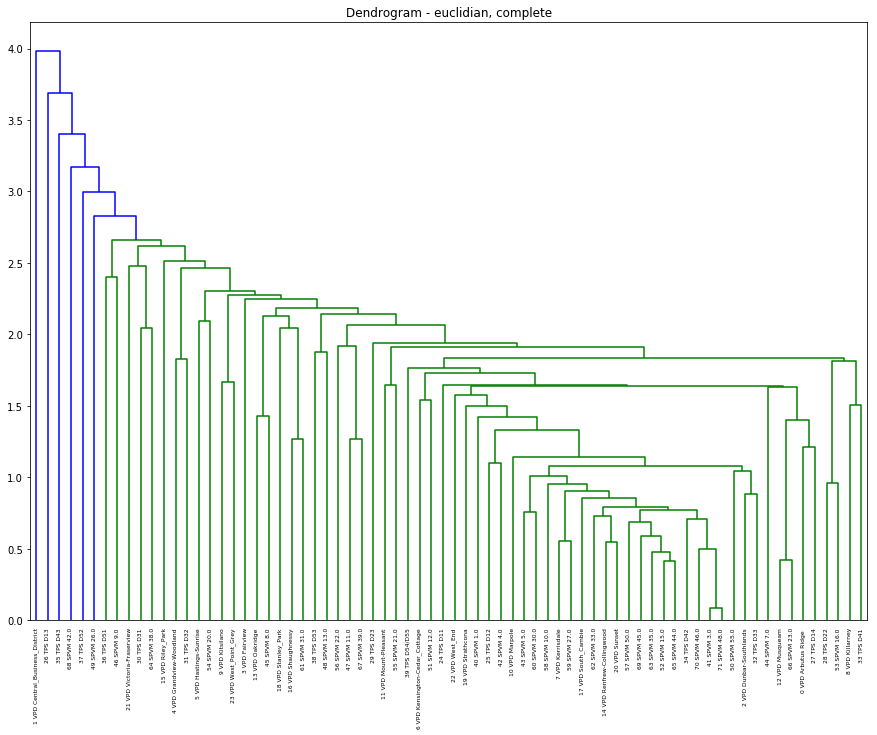

In [92]:
# euclidean
plt.figure(figsize=(15,11))
plt.title('Dendrogram - euclidian, complete')
plot_dendrogram(agglom1)
plt.show()

This is not really desirable

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

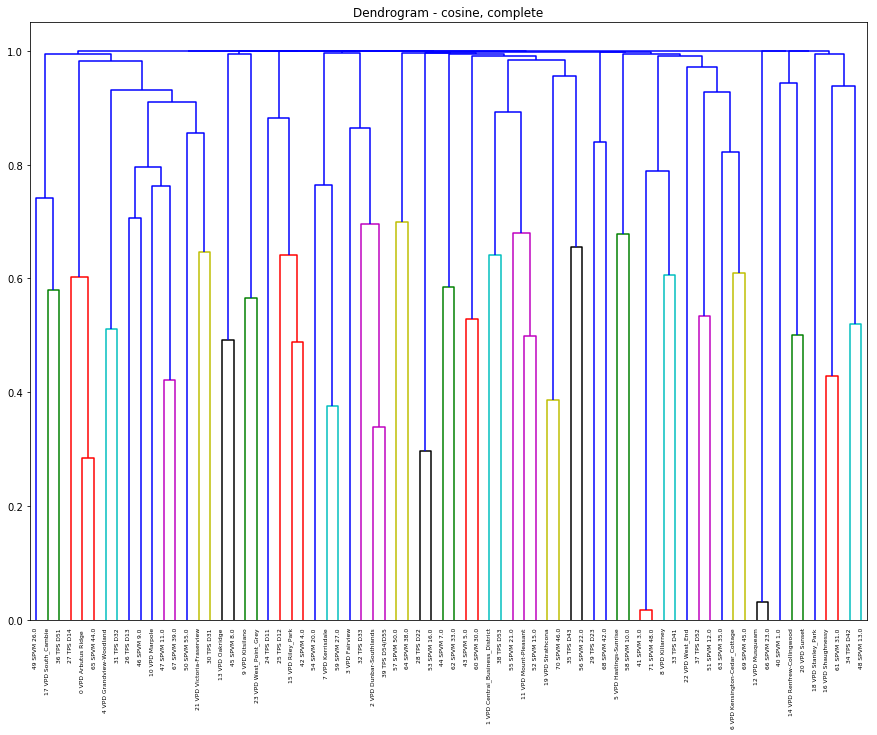

In [93]:
# cosine
plt.figure(figsize=(15,11))
plt.title('Dendrogram - cosine, complete')
plot_dendrogram(agglom_cos)
plt.show()

ok this does not make sense

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [94]:
# l1
agglom_l1 = AgglomerativeClustering(n_clusters=None, affinity='l1', linkage='complete', distance_threshold=6)
agglom_l1.fit(feature_mtx)
print(agglom_l1.labels_)
print(agglom_l1.n_clusters_)

[ 2 15  2 22 18  2  0  2  5 23  0 20  2 12  2 21  2  2  2  2  2 19  2 25
  2  2 24 28 27  2 17 14  2  5  2 13 11  9 10  1  2  2  2  2  2 12 16 26
  4  7  0  1  2  0  6  0  8  2  2  2  2  2  2  2  2  2  2 26  3  2  2  2]
29


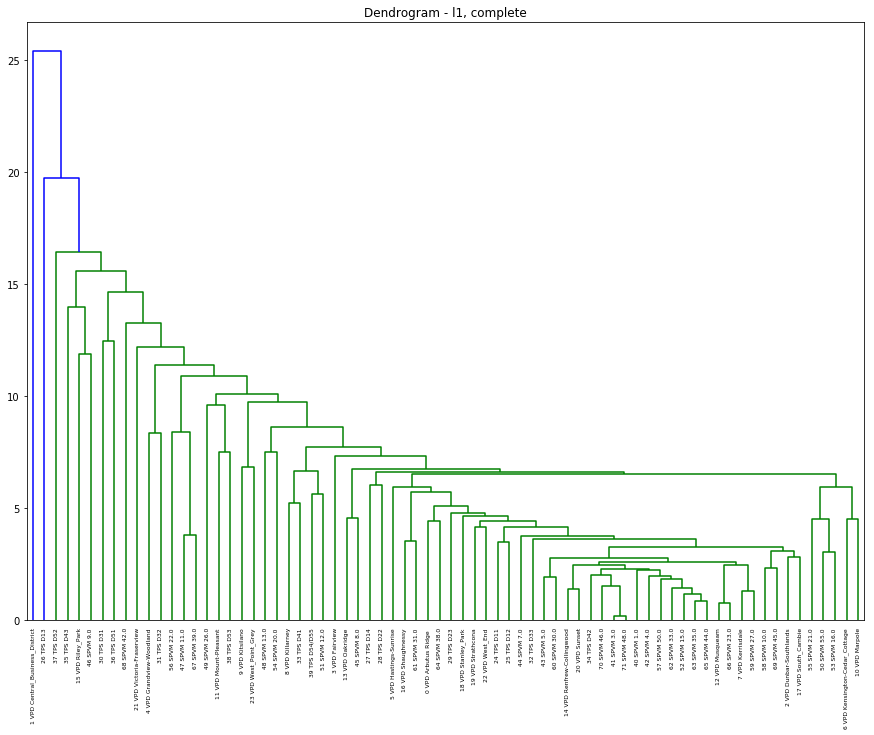

In [95]:
plt.figure(figsize=(15,11))
plt.title('Dendrogram - l1, complete')
plot_dendrogram(agglom_l1)
plt.show()

the pattern looks pretty similar to euclidean where the highest point is to the left

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [96]:
# l2
agglom_l2 = AgglomerativeClustering(n_clusters=None, affinity='l2', linkage='complete', distance_threshold=2)
agglom_l2.fit(feature_mtx)
print(agglom_l2.labels_)
print(agglom_l2.n_clusters_)

[ 0 15  0 16  2 19  0  0  0  6  0  0  0  8  0 20  4  0 21  0  0 22  0  6
  0  0 11  0  0  0 10  2  0  0  0  9 12 13  3  0  0  0  0  0  0  8 17  1
  3  5  0  0  0  0 18  0  1  0  0  0  0  4  0  0 14  0  0  1  7  0  0  0]
23


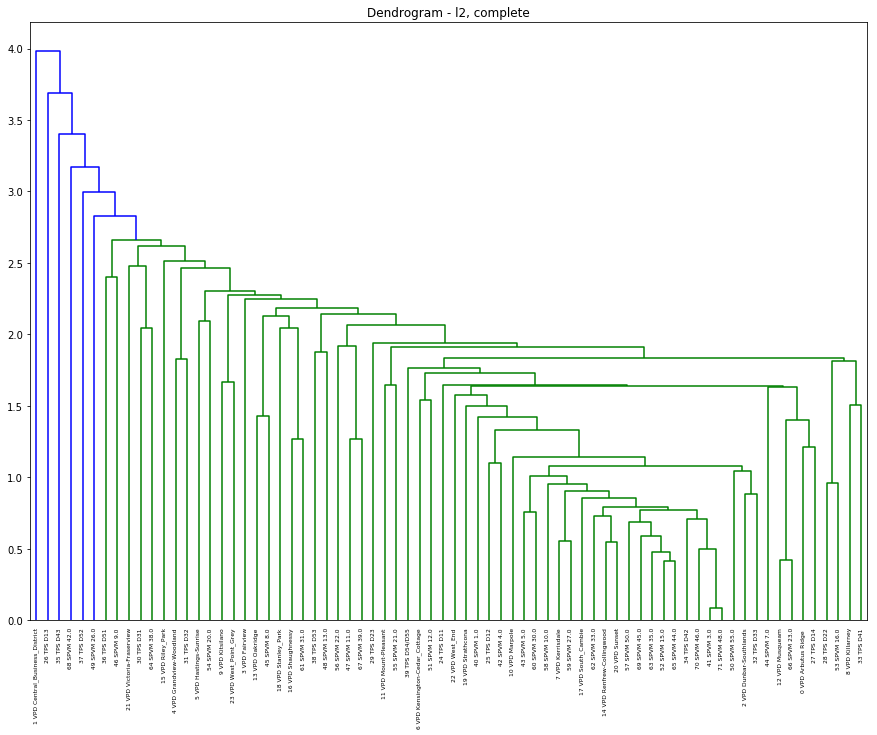

In [97]:
plt.figure(figsize=(15,11))
plt.title('Dendrogram - l2, complete')
plot_dendrogram(agglom_l2)
plt.show()

This looks exactly like euclidean

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [98]:
# manhattan
agglom_man = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='complete', distance_threshold=5)
agglom_man.fit(feature_mtx)
print(agglom_man.labels_)
print(agglom_man.n_clusters_)

[ 1 31  0 22 18 30  5  0 33 23  5 20  0  2  0 21  3  0  0  0  0 19  0 25
  0  0 24 28 27  0 17 29  0 32  0 13 11  9 10 15  0  0  0  0  0  2 34 12
  4 16  6 26  0  6 14  6  8  0  0  0  0  3  0  0  1  0  0 12  7  0  0  0]
35


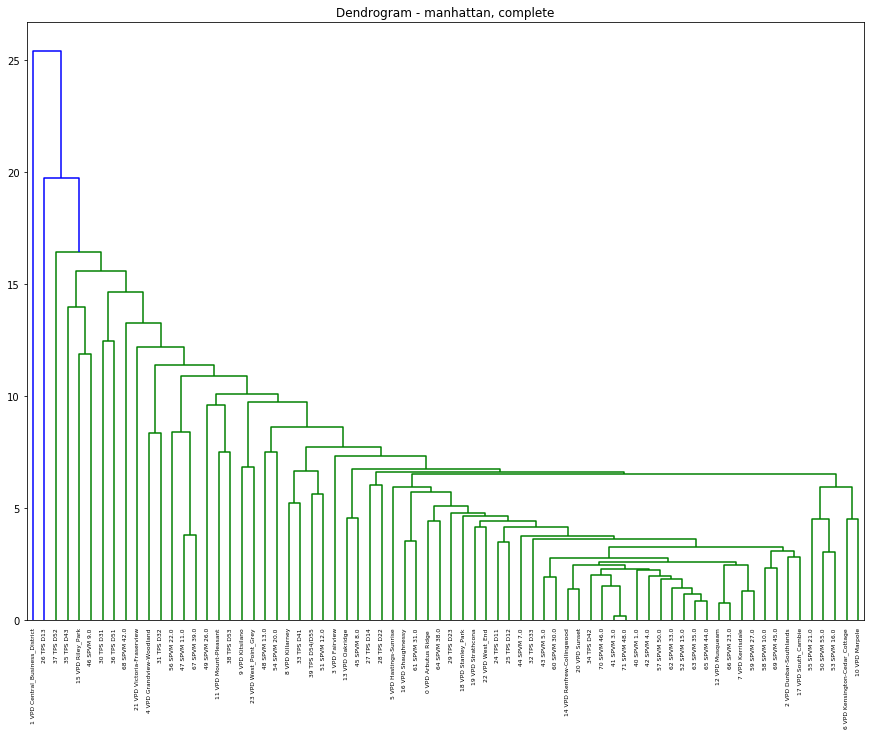

In [99]:
plt.figure(figsize=(15,11))
plt.title('Dendrogram - manhattan, complete')
plot_dendrogram(agglom_man)
plt.show()

Also very similar to euclidean

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [100]:
# precomputed
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
agglom_pre = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', distance_threshold=3)
agglom_pre.fit(dist_matrix)
print(agglom_pre.labels_)
print(agglom_pre.n_clusters_)

[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
5


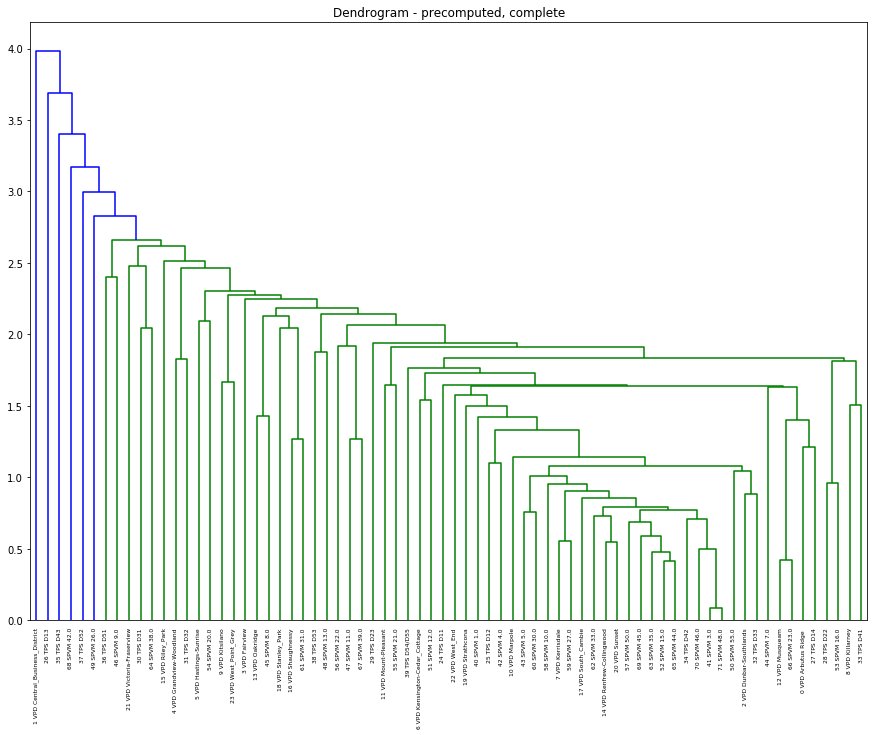

In [101]:
plt.figure(figsize=(15,11))
plt.title('Dendrogram - precomputed, complete')
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode='level', p=3)
plot_dendrogram(agglom_pre)
plt.show()

Now let's try a different experiment to test out the different linkage methods:
- keep affinity equal to the default which is 'euclidean'
- try all other linkage methods: ward, average, single

In [102]:
# euclidean, ward
agglom_war = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=3)
agglom_war.fit(feature_mtx)
print(agglom_war.labels_)
print(agglom_war.n_clusters_)

[1 3 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 0 1 1 1 4 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]
6


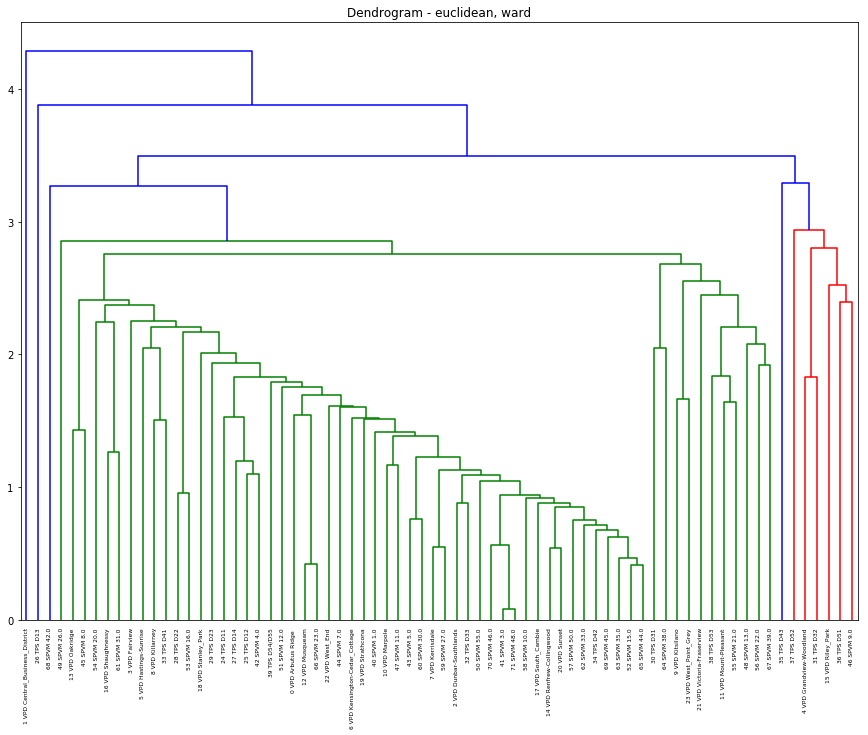

In [103]:
plt.figure(figsize=(15,11))
plt.title('Dendrogram - euclidean, ward')
plot_dendrogram(agglom_war)
plt.show()

iiiiiiiinteresting..... I like that it is not as skewed looking as the 'complete' linkage option

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [104]:
# euclidean, average
agglom_ave = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=2.5)
agglom_ave.fit(feature_mtx)
print(agglom_ave.labels_)
print(agglom_ave.n_clusters_)

[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
5


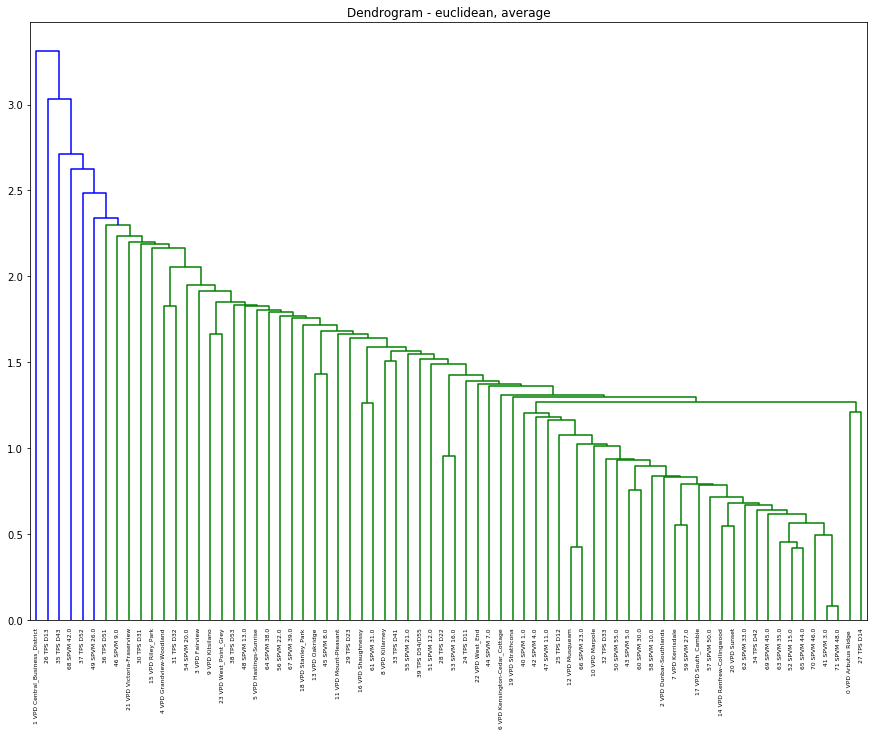

In [105]:
plt.figure(figsize=(15,11))
plt.title('Dendrogram - euclidean, average')
plot_dendrogram(agglom_ave)
plt.show()

Looks like the same shape as complete

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [106]:
# euclidean, single
agglom_sin = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=2)
agglom_sin.fit(feature_mtx)
print(agglom_sin.labels_)
print(agglom_sin.n_clusters_)

[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 4 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
6


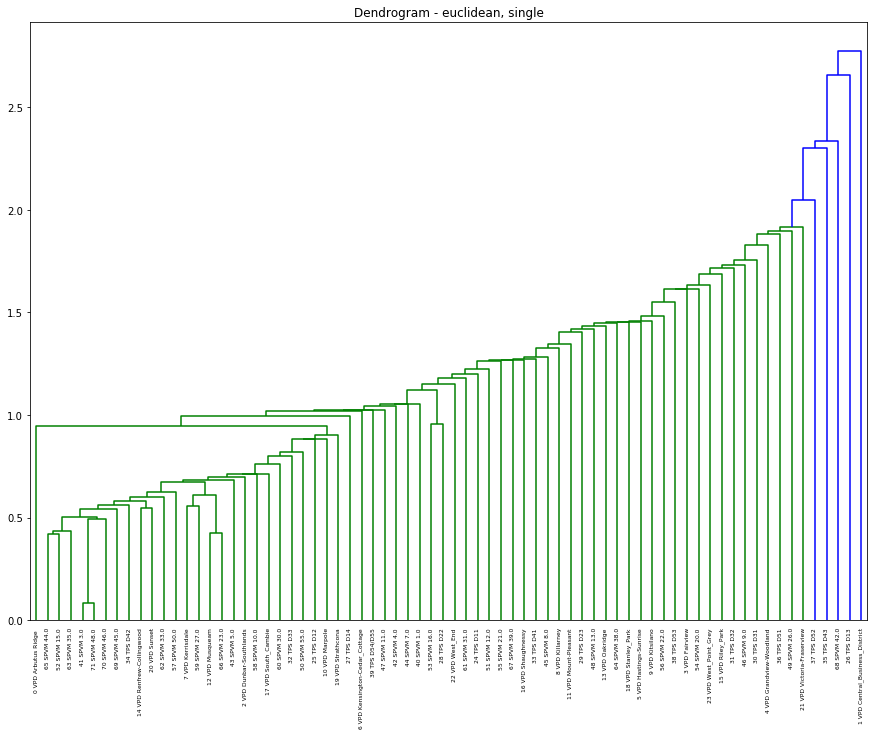

In [107]:
plt.figure(figsize=(15,11))
plt.title('Dendrogram - euclidean, single')
plot_dendrogram(agglom_sin)
plt.show()

interesting, this is skewed the other way. but skewed nonetheless. Also the points that are the last to be clustered is similar to that in complete

----------------------------------------------------------------------------------------------__end of eperimentation__-----------------------------------------------------------------------------------

Final decision for algorithm parameters:

In [108]:
# euclidean, ward
agglom_war = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=3)
agglom_war.fit(feature_mtx)
print(agglom_war.labels_)
print(agglom_war.n_clusters_)

[1 3 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 0 1 1 1 4 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]
6


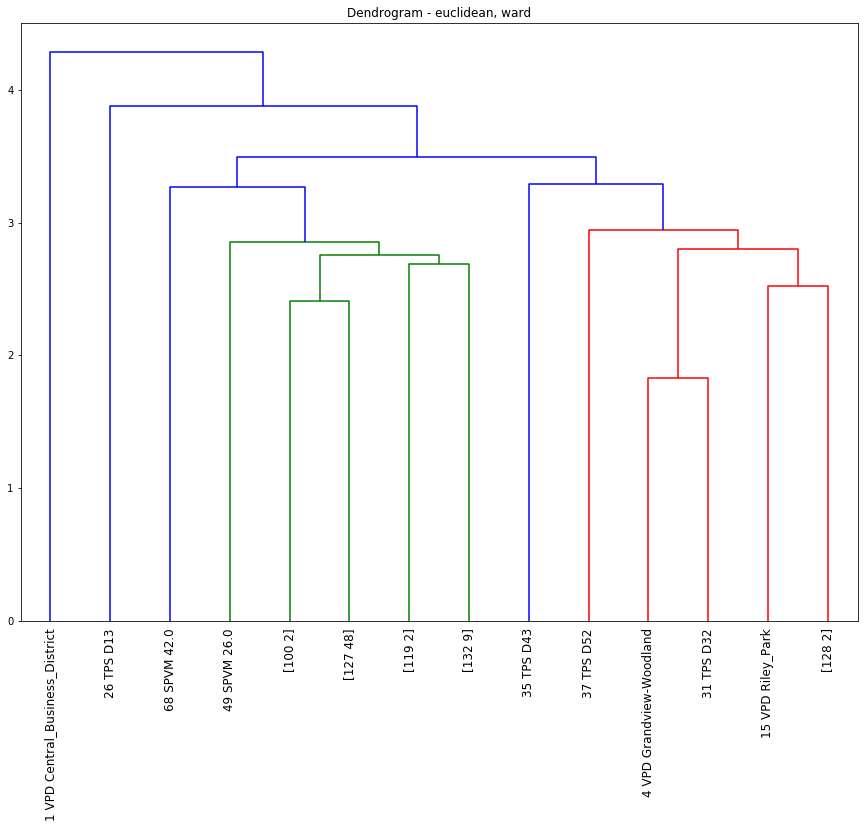

In [109]:
# re-plot dendrogram but make it easier to read 
plt.figure(figsize=(15,11))
plt.title('Dendrogram - euclidean, ward')
# Only show the top 6 levels of the dendrogram
plot_dendrogram(agglom_war, truncate_mode='level', p=6)
plt.show()

## Part 5: Analyze clusters
- compare average of each feature between clusters
- observations

In [110]:
agglom_war.labels_.shape

(72,)

In [111]:
# add clusters label to dataframe
final_df['Cluster Labels'] = agglom_war.labels_
final_df.head()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Breakfast Spot,Seafood Restaurant,Athletics & Sports,...,Snack Place,Vegetarian / Vegan Restaurant,Diner,Performing Arts Venue,Health Food Store,German Restaurant,Fish & Chips Shop,Pool,Pizza Place,Cluster Labels
Neighborhood,,,,,,,,,,,,,,,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,0.000,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123,0.125,0.428571,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.153846,3
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,0.000,0.142857,0.5,...,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.307692,0


In [112]:
# groupby cluster label and take the average of each feature in the group
groupby_clusters = final_df.groupby('Cluster Labels').mean()
groupby_clusters

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Breakfast Spot,Seafood Restaurant,Athletics & Sports,...,Gay Bar,Snack Place,Vegetarian / Vegan Restaurant,Diner,Performing Arts Venue,Health Food Store,German Restaurant,Fish & Chips Shop,Pool,Pizza Place
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,0.051178,0.050868,0.045271,0.057612,0.056668,0.058033,0.058558,0.125000,0.107143,0.333333,...,0.000000,0.000000,0.358333,0.075000,0.050000,0.000000,0.000000,0.166667,0.000000,0.140573
1,0.034922,0.033884,0.033798,0.036425,0.036186,0.034168,0.030941,0.026210,0.014977,0.000000,...,0.032258,0.032258,0.004032,0.037097,0.027419,0.024194,0.016129,0.016129,0.032258,0.031227
2,0.025549,0.034652,0.032677,0.027023,0.067577,0.032958,0.040698,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123,0.125000,0.428571,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.153846
4,0.083227,0.098333,0.114394,0.106329,0.115246,0.075953,0.099437,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.040973,0.033745,0.049242,0.062785,0.063625,0.032263,0.026892,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.600000,0.250000,0.000000,0.500000,0.000000,0.000000,0.000000,0.066667


There are too many features, it is hard to manually compare them all

Try to choose __notable features__ that may help explain the distinction between clusters

In [113]:
# dataframe with only points in cluster 0
clus_0 = final_df[final_df['Cluster Labels']==0]

In [114]:
# dataframe with only points in cluster 1
clus_1 = final_df[final_df['Cluster Labels']==1]

In [115]:
# this is the dataframe without the outliers - only cluster 0 and cluster 1
clus_0_1 = pd.concat([clus_0, clus_1])

In [116]:
# get univariate statistics (mean and std) 
zero_univar = clus_0.describe().iloc[1:3,:].T # cluster 0
one_univar = clus_1.describe().iloc[1:3,:].T # cluster 1
no_outlier_univar = clus_0_1.describe().iloc[1:3,:].T # cluster 0 and 1
no_outlier_univar.head()

,mean,std
Sex Offences,0.036356,0.023917
Assaults,0.035382,0.028369
Robbery,0.034810,0.028886
Break & Enter,0.038294,0.025577
Auto Theft,0.037993,0.025460


In [117]:
# notable features for 0 cluster: where mean is greater than the norm
zero_notable = zero_univar.loc[zero_univar['mean'] > no_outlier_univar['mean']].index
zero_notable = set(zero_notable)

In [118]:
len(zero_notable)

73

In [119]:
# v notable features for 0 cluster: where std is smaller than the norm
zero_v_notable = zero_univar.loc[(zero_univar['std'] < no_outlier_univar['std'])].index
print(len(zero_v_notable))
zero_v_notable = set(zero_v_notable)

57


In [120]:
# features where both mean is greater, and std is smaller than the norm
zero_univar.loc[list(zero_notable & zero_v_notable)]

,mean,std
Portuguese Restaurant,0.055556,0.136083
Wine Bar,0.041667,0.102062
Sushi Restaurant,0.086275,0.021263
Dessert Shop,0.048611,0.076452
Korean Restaurant,0.041667,0.102062
Ramen Restaurant,0.083333,0.139443
Supermarket,0.083333,0.129099
Diner,0.075000,0.117260
Thai Restaurant,0.172619,0.099531
Breakfast Spot,0.125000,0.064550


Visualize the characteristic of Cluster 0 compared to Cluster 1 using selections of the notable features from above

Thai restaurant

Text(0.5,1,'Thai Restaurant histogram')

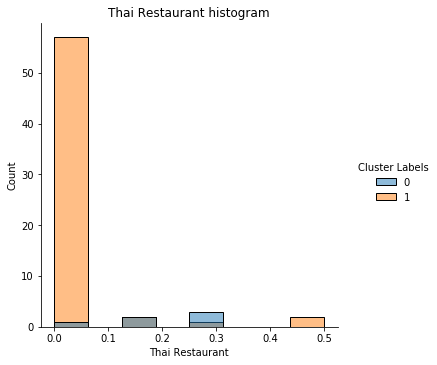

In [121]:
# histogram comparing distributions
sns.displot(clus_0_1, x='Thai Restaurant', hue='Cluster Labels')
plt.title('Thai Restaurant histogram')

Text(0.5,1,'Thai Restaurant kernel density estimate')

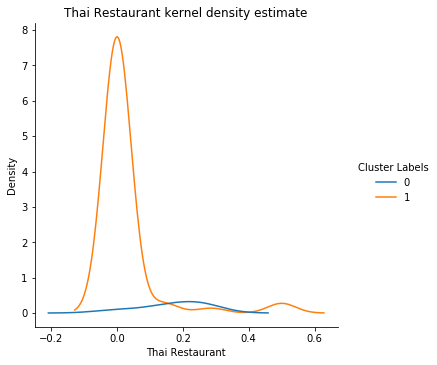

In [122]:
# kernel density estimation plot
sns.displot(clus_0_1, x='Thai Restaurant', kind='kde', hue='Cluster Labels')
plt.title('Thai Restaurant kernel density estimate')

Sushi restaurant

Text(0.5,1,'Sushi Restaurant histogram')

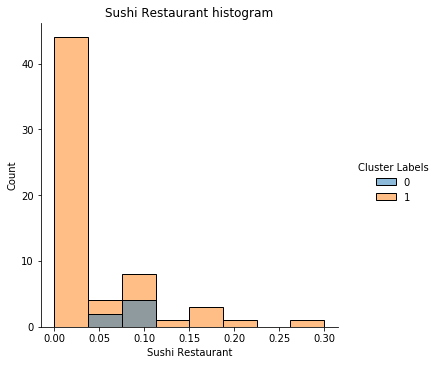

In [123]:
sns.displot(clus_0_1, x='Sushi Restaurant', hue='Cluster Labels')
plt.title('Sushi Restaurant histogram')

Text(0.5,1,'Sushi Restaurant kernel density estimate')

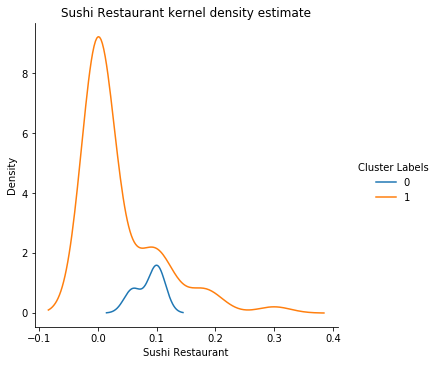

In [124]:
sns.displot(clus_0_1, x='Sushi Restaurant', kind='kde', hue='Cluster Labels')
plt.title('Sushi Restaurant kernel density estimate')

Breakfast spot

Text(0.5,1,'Breakfast Spot histogram')

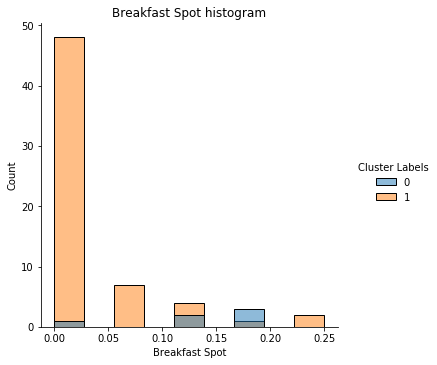

In [125]:
sns.displot(clus_0_1, x='Breakfast Spot', hue='Cluster Labels')
plt.title('Breakfast Spot histogram')

Text(0.5,1,'Breakfast Spot kernel density estimate')

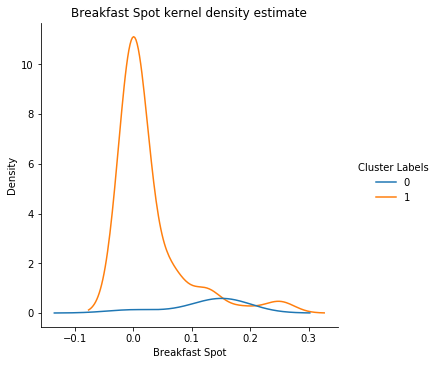

In [126]:
sns.displot(clus_0_1, x='Breakfast Spot', kind='kde', hue='Cluster Labels')
plt.title('Breakfast Spot kernel density estimate')